<a href="https://colab.research.google.com/github/labtask/demo/blob/master/aligned_faces_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.optimizers import adam
from keras.constraints import max_norm
import numpy as np
import keras.backend as K

import sys
import numpy
import tensorflow as tf
import keras
import numpy as np
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten,Add , Multiply ,Concatenate ,Dot
from keras import models
from keras.optimizers import SGD,Adam, RMSprop
#from keras.models import Sequential, Model
from keras.engine import  Model
from keras import regularizers
from matplotlib import pyplot as plt
from keras.layers import BatchNormalization
from google.colab.patches import cv2_imshow
import imutils
import cv2
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/bmi

/content/drive/My Drive/bmi


In [0]:
import matplotlib.pyplot as plt
for i in range(0,4207):
  skin='crop_img_'+str(i)+'.bmp'
  #img_0skin_nose.bmp
  try:
    plt.imread('/content/drive/My Drive/crop/images/'+skin )
    #print(i)
  except:
    print(skin)


In [0]:
from sklearn.kernel_ridge import KernelRidge
from PIL import Image
#from keras_vggface import VGGFace #new line
from keras.preprocessing import image
#from keras_vggface import utils #new
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input , Dropout
from keras.layers.pooling import GlobalAveragePooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import csv
#from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.svm import SVR
import pickle
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.layers import InputLayer
from keras.models import load_model
from sklearn.externals import joblib
from sklearn.linear_model import Ridge
#from keras.applications.resnet50 import ResNet50 #new for resnet
#from keras.applications.resnet import ResNet101, ResNet152
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.resnet50 import preprocess_input, decode_predictions  #new for resnet
import cv2
#from keras_vggface.models import RESNET50, VGG16, SENET50 #new
###################################### Load Data ##########################################################################


i = 0
X_train_key = []
X_test_key  =[]
train_bmi =[]
test_bmi=[]

 

################################### Data Preperation ##########################################################################

def get_data_by_id(path):
    #print(path)
    try:
        #img = Image.open('Release/Data/region_based/' + path ).convert('L')
        img = Image.open('/content/drive/My Drive/bmi/Release/Data/aligned/'+ path )
        max_edge = max(img.size[0], img.size[1])
        #print(img.size)
        image_sum = img.size[0] + img.size[1]
        black = Image.new('L',(max_edge, max_edge),0)
        crop_img = [int(max_edge/2 - img.size[0]/2) , int(max_edge/2 - img.size[1]/2),
                int(max_edge/2 + (img.size[0]+1)/2) ,int(max_edge/2 + (img.size[1]+1)/2)]


        if (image_sum + crop_img[0]+crop_img[1] != crop_img[2] +crop_img[3]):
            if (crop_img[0] == 0):
                black.paste(img, [crop_img[0],crop_img[1]+1, crop_img[2],crop_img[3]])
            else:
                black.paste(img, [crop_img[0]+1,crop_img[1], crop_img[2],crop_img[3]])
        else:
            black.paste(img, [crop_img[0],crop_img[1], crop_img[2],crop_img[3]])

        img = black.resize((224,224)) 
        #img = black.resize((224,224))
        #plt.imshow(img)
        img = np.array(img).astype(np.float32)
        
        img -= np.mean(img)
        img /= np.std(img)

        #bmi = bmi_file[bmi_file['name'] == path]['bmi']
        print(path)
        return img
    except ValueError:
        print('error')


def get_batch(id_list):

    size = len(id_list)
    image_batch = np.zeros((size,224,224,3))
    bmi_batch = np.zeros((size))

    for i in range(size):
        #print('id_list',id_list[i])
        image = get_data_by_id(id_list[i])
        #image2, bmi2 = get_data_by_id2(id_list[i],bmi_file)
        #image3, bmi3 = get_data_by_id3(id_list[i],bmi_file)
        #image_batch[i,:,:,:]=image
        image_batch[i,:,:,0] = image
        image_batch[i,:,:,1] = image
        image_batch[i,:,:,2] = image
        #print(i, type(i))
    #print(bmi, type(bmi))
    return image_batch

########################################################## Embeddings ###############################################################3
#weight_path = 'VGGFace/vgg_face.npy'
#model = MobileNetV2(weights='imagenet',  include_top=False) #4096
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) 
#model.compile(optimizer=sgd, loss='categorical_crossentropy')

base_model = VGGFace(weights='vggface') #4096
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc6').output)


train_embeddings = np.zeros((3368, 4096)) #previous 4096

train_bmis = np.zeros((3368))
test_embeddings = np.zeros((840, 4096)) #previous 4096
test_bmis = np.zeros(840)
j=0
#for i in range(0,len(X_train_key[:3370])):
n=[]
for i in range(0,4208):
  if(i<3368):
    skin=str(i)+'.bmp'
    try:
        imag =  get_batch([skin])
        #x = preprocess_input(imag )
        x=imag
        fc6_pool_features_org = model.predict(x)
        train_embeddings[i] = fc6_pool_features_org
        #print('embed', train_embeddings[i])
            
    except TypeError:
        n.append(i)
        continue
  else:
    skin=str(i)+'.bmp'
    try:
        imag =  get_batch([skin])
        
        #x = preprocess_input(imag)
        x=imag
        fc6_pool_features_org = model.predict(x)
        test_embeddings[j] = fc6_pool_features_org
        #print(len(train_embeddings[i]))
        #test_bmis[i] = bmi_batch 
        j+=1
    except TypeError:
        n.append(i)
        continue

######################################################### Fit SVR ######################################################################
print(train_embeddings[0], len(train_embeddings[0]))

"""
epsvr=SVR(gamma='scale', C=1.0, epsilon=15.0)
epsvr.fit( np.concatenate([train_embeddings, test_embeddings]), np.concatenate([train_bmis, test_bmis]) )
joblib.dump(epsvr, 'bmi_eplsvm_regression_model_vgg16.pkl')
"""
""""
clf = SVR(C=0.1, kernel='linear', verbose = True)
clf.fit( train_embeddings,train_bmis )
joblib.dump(clf, 'vggFace_conv5_2_rm_Cropped_SegmentedImagesBackgroundRemoved.pkl') """
######################################################## Kernelised Ridge Regression ##############################################################################
"""
kr = KernelRidge(kernel='rbf', gamma=0.1)
kr.fit( np.concatenate([train_embeddings, test_embeddings]), np.concatenate([train_bmis, test_bmis]) )
joblib.dump(kr, 'bmi_krr_regression_model.pkl') 
print(test_bmis)


ridge = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
ridge.fit( np.concatenate([train_embeddings, test_embeddings]), np.concatenate([train_bmis, test_bmis]) )
joblib.dump(ridge, 'bmi_ridge_regression_model.pkl') 
""" 

#Features with L1 and L2
#np.save("/content/drive/My Drive/alignment/align_4096_train",train_embeddings)
#np.save("/content/drive/My Drive/alignment/align_4096_test",test_embeddings)

train_bmi=np.load("Updated/train_bmi.npy")
test_bmi=np.load("Updated/test_bmi.npy")
from sklearn import preprocessing as fu
train_embeddings_l1=fu.normalize(train_embeddings,  norm='l1', axis=1)
test_embeddings_l1=fu.normalize(test_embeddings,  norm='l1', axis=1)
train_embeddings_l2=fu.normalize(train_embeddings,  norm='l2', axis=1)
test_embeddings_l2=fu.normalize(test_embeddings,  norm='l2', axis=1)



"""
clf_normal = SVR(kernel='linear', C=0.1, gamma='auto')
clf_normal.fit( train_embeddings,train_bmi )
predicted_bmi=clf_normal.predict(test_embeddings)
#Pearson
from scipy import stats
print("SVR With FC2 Features",stats.pearsonr(test_bmi, predicted_bmi))

clf_l1 = SVR(kernel='linear', C=0.1, gamma='auto')
clf_l1.fit( train_embeddings_l1,train_bmi )
predicted_bmi2=clf_l1.predict(test_embeddings_l1)
#Pearson
from scipy import stats
print("SVR With FC2_L1 Features",stats.pearsonr(test_bmi, predicted_bmi2))

clf_l2 = SVR(kernel='linear', C=0.1, gamma='auto')
clf_l2.fit( train_embeddings_l2,train_bmi )
predicted_bmi3=clf_l2.predict(test_embeddings_l2)
#Pearson
from scipy import stats
print("SVR With FC2_L2 Features",stats.pearsonr(test_bmi, predicted_bmi3)) """



0.bmp
1.bmp
2.bmp
3.bmp
4.bmp
5.bmp
6.bmp
7.bmp
8.bmp
9.bmp
10.bmp
11.bmp
12.bmp
13.bmp
14.bmp
15.bmp
16.bmp
17.bmp
18.bmp
19.bmp
20.bmp
21.bmp
22.bmp
23.bmp
24.bmp
25.bmp
26.bmp
27.bmp
28.bmp
29.bmp
30.bmp
31.bmp
32.bmp
33.bmp
34.bmp
35.bmp
36.bmp
37.bmp
38.bmp
39.bmp
40.bmp
41.bmp
42.bmp
43.bmp
44.bmp
45.bmp
46.bmp
47.bmp
48.bmp
49.bmp
50.bmp
51.bmp
52.bmp
53.bmp
54.bmp
55.bmp
56.bmp
57.bmp
58.bmp
59.bmp
60.bmp
61.bmp
62.bmp
63.bmp
64.bmp
65.bmp
66.bmp
67.bmp
68.bmp
69.bmp
70.bmp
71.bmp
72.bmp
73.bmp
74.bmp
75.bmp
76.bmp
77.bmp
78.bmp
79.bmp
80.bmp
81.bmp
82.bmp
83.bmp
84.bmp
85.bmp
86.bmp
87.bmp
88.bmp
89.bmp
90.bmp
91.bmp
92.bmp
93.bmp
94.bmp
95.bmp
96.bmp
97.bmp
98.bmp
99.bmp
100.bmp
101.bmp
102.bmp
103.bmp
104.bmp
105.bmp
106.bmp
107.bmp
108.bmp
109.bmp
110.bmp
111.bmp
112.bmp
113.bmp
114.bmp
115.bmp
116.bmp
117.bmp
118.bmp
119.bmp
120.bmp
121.bmp
122.bmp
123.bmp
124.bmp
125.bmp
126.bmp
127.bmp
128.bmp
129.bmp
130.bmp
131.bmp
132.bmp
133.bmp
134.bmp
135.bmp
136.bmp
137.bmp
138.bm

'\nclf_normal = SVR(kernel=\'linear\', C=0.1, gamma=\'auto\')\nclf_normal.fit( train_embeddings,train_bmi )\npredicted_bmi=clf_normal.predict(test_embeddings)\n#Pearson\nfrom scipy import stats\nprint("SVR With FC2 Features",stats.pearsonr(test_bmi, predicted_bmi))\n\nclf_l1 = SVR(kernel=\'linear\', C=0.1, gamma=\'auto\')\nclf_l1.fit( train_embeddings_l1,train_bmi )\npredicted_bmi2=clf_l1.predict(test_embeddings_l1)\n#Pearson\nfrom scipy import stats\nprint("SVR With FC2_L1 Features",stats.pearsonr(test_bmi, predicted_bmi2))\n\nclf_l2 = SVR(kernel=\'linear\', C=0.1, gamma=\'auto\')\nclf_l2.fit( train_embeddings_l2,train_bmi )\npredicted_bmi3=clf_l2.predict(test_embeddings_l2)\n#Pearson\nfrom scipy import stats\nprint("SVR With FC2_L2 Features",stats.pearsonr(test_bmi, predicted_bmi3)) '

In [0]:
train_embeddings2=np.load("Updated/All_train_images.npy")
test_embeddings2=np.load("Updated/All_test_images.npy")
train_bmi=np.load("Updated/train_bmi.npy")
test_bmi=np.load("Updated/test_bmi.npy")

In [0]:
train_embeddings2=np.load("skinnose/train_skin_images_cropped.npy")

In [0]:
plt.imshow

(3368, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


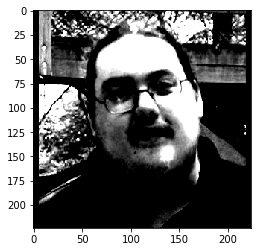

In [0]:
plt.imshow(train_embeddings2[18])

In [0]:
I0 = train_embeddings2[0] 

sum=[]
Total=[]
I0=cv2.imread('/content/drive/My Drive/bmi/Release/Data/Images/img_0.bmp')

sum.append((np.sum(np.sum(I0,axis=0),axis=0))/(I0.size))
#print(sum)



for i in range(1,4207): #Read in remaining images
  name='img_'+str(i)+'.bmp'
  rgbImage = cv2.imread('/content/drive/My Drive/bmi/Release/Data/Images/'+name)
  sum.append((np.sum(np.sum(rgbImage,axis=0),axis=0))/(rgbImage.size))
  #sum.append(np.sum(np.sum(rgbImage,axis=0), axis=0))
  #print(np.sum(np.sum(rgbImage,axis=0), axis=0).shape)
  #fghgh
 
  #sumImage = sumImage + np.sum(rgbImage)

Total=np.sum(sum,axis=0)/(4207)
print(Total)
#meanImage = sumImage / 3368;

[31.42448859 35.3167212  44.07247588]


In [0]:
np.save("skinnose/total_of_rgb_mean_All_4207",Total)

In [0]:
Total=np.load("skinnose/total_of_rgb_mean.npy")

In [0]:
print(Total)

[31.42448859 35.3167212  44.07247588]


In [0]:
sumImage = np.sum(train_embeddings2, axis = 0)/3368

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


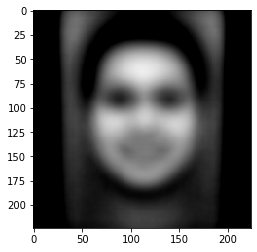

In [0]:
plt.imshow(sumImage)

In [0]:
final_sum = np.sum(sumImage)

In [0]:
print(final_sum)

-4.147123979691969e-05


In [0]:
plt.imshow(meanImage)

(224, 224, 3)


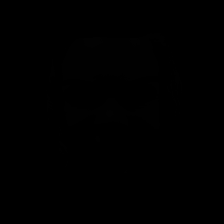

In [0]:

skin='img_3368skin_nose.bmp'
img='img_3368.bmp'
mask = cv2.imread('/content/drive/My Drive/makeup/res/test_res/'+skin , 0)
mask = imutils.resize(mask, width=224,height=224)
#mask=(mask-255)/255
masklist = [mask for i in range(3)]
mask= np.stack(masklist, axis=-1)
print(mask.shape)

image_copy=mask
mask2 = np.all(mask == [255, 255,255], axis=-1)

#non_black_pixels_mask = np.any(image != [1, 1, 1], axis=-1) 
#print(mask2)
image_copy[mask2] = [0,0,0]
mask3 = np.all(mask != [0,0,0], axis=-1)
image_copy[mask3] = [1,1,1]
#cv2_imshow(image_copy*255)
#image_copy[non_black_pixels_mask] = [0, 0,0]
#print(image_copy[129,:])
image=train_embeddings2[3367]
img3=image_copy*image
cv2_imshow(img3)


In [0]:
pip install keras-vggface

In [0]:
from keras_vggface import VGGFace
model=VGGFace()





580075520/580070376 [==============================] - 15s 0us/step








In [0]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0   

for cropped faces

In [0]:
#base_model = VGGFace(weights='vggface') #4096
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc6').output)
#train_skin_embeddings=np.zeros((3368, 4096))
#test_skin_embeddings=np.zeros((840, 4096))
train_skin_embeddings=np.zeros((3368, 224,224,3))
test_skin_embeddings=np.zeros((840, 224,224,3))

for i in range(0,4207):
    skin='img_'+str(i)+'skin_nose.bmp'
    img='img_'+str(i)+'.bmp'
    mask = cv2.imread('/content/drive/My Drive/makeup/res/skin_nose_512size/'+skin , 0)
    mask = imutils.resize(mask, width=224,height=224)
    masklist = [mask for i in range(3)]
    mask= np.stack(masklist, axis=-1)

    image_copy=mask
    mask2 = np.all(mask == [255, 255,255], axis=-1)

    image_copy[mask2] = [0,0,0]
    mask3 = np.all(mask != [0,0,0], axis=-1)

    image_copy[mask3] = [1,1,1]
    #cv2_imshow(image_copy*255)
    #print(image_copy[129,:])
    
    j=0
    if(i<3368):
      image=train_embeddings2[i]
    else:
      image=test_embeddings2[j]
      j=j+1
    img3=image*image_copy
    #cv2_imshow(img3*255)
  
    #print(img3[129,:])
    image_copy=img3
    mask = image_copy> 0
    if image_copy.ndim==3:
        mask = mask.all(2)
    mask0,mask1 = mask.any(0),mask.any(1)
    img3=image_copy[np.ix_(mask0,mask1)]

    if(i<3368):
      try:
        cv2.imwrite('/content/drive/My Drive/bmi/Release/Data/cropped_whole/'+str(i)+'.bmp',img3)
      except:
        cv2.imwrite('/content/drive/My Drive/bmi/Release/Data/cropped_whole/'+str(i)+'.bmp',image)
    else:
      try:
        cv2.imwrite('/content/drive/My Drive/bmi/Release/Data/cropped_whole/'+str(i)+'.bmp',img3)
      except:
        cv2.imwrite('/content/drive/My Drive/bmi/Release/Data/cropped_whole/'+str(i)+'.bmp',image)
    print('Image No '+str(i))
#cv2_imshow(img3*255)
#cv2.imwrite('/content/drive/My Drive/bmi/Release/Data/skinnose/'+str(i)+'.bmp',img3)
#np.save("skinnose/train_skin_images",train_skin_embeddings)
#np.save("skinnose/test_skin_images",test_skin_embeddings)
"""
    #print(img3[129,:])
    if(i<3368):
      try:
          x = np.expand_dims(img3, axis=0)
          fc6_pool_features = model.predict(x)
          train_skin_embeddings[i]=fc6_pool_features
      except TypeError:
          continue
    else:
      try:
          print(img3.shape)
          x = np.expand_dims(img3, axis=0)
          print(x.shape)
          fc6_pool_features = model.predict(x)
          test_skin_embeddings[j]=fc6_pool_features
      except TypeError:
          continue
    print('Image No '+str(i))
np.save("skinnose/train_mean_skinnose_org_images",train_skin_embeddings)
np.save("skinnose/test_mean_skinnose_org_images",test_skin_embeddings)"""

FACE Regions except bg, hair and cloth --> GAP

In [0]:
base_model = VGGFace(weights='vggface') #4096
model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_3').output)
#train_skin_embeddings=np.zeros((3368, 4096))
#test_skin_embeddings=np.zeros((840, 4096))
train_skin_embeddings=np.zeros((3368, 512))
test_skin_embeddings=np.zeros((840, 512))

for i in range(0,4207):
    #skin='img_'+str(i)+'face.bmp'
    skin='img_'+str(i)+'skin_nose.bmp'
    img='img_'+str(i)+'.bmp'
    #mask = cv2.imread('/content/drive/My Drive/makeup/res/face2/'+skin,0)
    mask = cv2.imread('/content/drive/My Drive/makeup/res/skin_nose_512size/'+skin,0)
    mask = imutils.resize(mask, width=14,height=14)
    masklist = [mask for i in range(3)]
    mask= np.stack(masklist, axis=-1)

    image_copy=mask
    mask2 = np.all(mask == [255, 255,255], axis=-1)

    image_copy[mask2] = [0,0,0]
    mask3 = np.all(mask != [0,0,0], axis=-1)

    image_copy[mask3] = [1,1,1]
    mask=image_copy[:, :, 0]
    masklist = [mask for i in range(512)]
    mask= np.stack(masklist, axis=-1)
    #print(mask.shape)
    #cv2_imshow(image_copy*255)
    #cv2_imshow(image_copy[:, :, 0]*255)


    j=0

    if(i<3368):
      try:
          image=train_embeddings2[i]
          x = np.expand_dims(image, axis=0)
          fc6_pool_features = model.predict(x)

          img3=mask*fc6_pool_features

        
          img3=np.mean(np.mean(img3, axis=1),axis=1) #Global average Pooling

          train_skin_embeddings[i]=img3
      except TypeError:
          continue
    else:
      try:
          image=test_embeddings2[j]
          j=j+1
          x = np.expand_dims(image, axis=0)
          fc6_pool_features = model.predict(x)
          img3=mask*fc6_pool_features
          img3=np.mean(np.mean(img3, axis=1),axis=1) #Global average Pooling
          test_skin_embeddings[j]=img3
      except TypeError:
          continue
    print('Image No '+str(i))
np.save("skinnose/feb4_train_face_images_gap_just_skin_nose",train_skin_embeddings)
np.save("skinnose/feb4_test_face_images_gap_just_skin_nose",test_skin_embeddings)

Image No 0
Image No 1
Image No 2
Image No 3
Image No 4
Image No 5
Image No 6
Image No 7
Image No 8
Image No 9
Image No 10
Image No 11
Image No 12
Image No 13
Image No 14
Image No 15
Image No 16
Image No 17
Image No 18
Image No 19
Image No 20
Image No 21
Image No 22
Image No 23
Image No 24
Image No 25
Image No 26
Image No 27
Image No 28
Image No 29
Image No 30
Image No 31
Image No 32
Image No 33
Image No 34
Image No 35
Image No 36
Image No 37
Image No 38
Image No 39
Image No 40
Image No 41
Image No 42
Image No 43
Image No 44
Image No 45
Image No 46
Image No 47
Image No 48
Image No 49
Image No 50
Image No 51
Image No 52
Image No 53
Image No 54
Image No 55
Image No 56
Image No 57
Image No 58
Image No 59
Image No 60
Image No 61
Image No 62
Image No 63
Image No 64
Image No 65
Image No 66
Image No 67
Image No 68
Image No 69
Image No 70
Image No 71
Image No 72
Image No 73
Image No 74
Image No 75
Image No 76
Image No 77
Image No 78
Image No 79
Image No 80
Image No 81
Image No 82
Image No 83
Im

In [0]:
train_skin_embeddings.shape

(3368, 512)

Jan 27 Original iamges testing only

instead of mean value using mean sum pixel value for each piexel

Reading the original images instead of preprocessed

In [0]:
test = VGGFace(weights= 'vggface', input_shape=(224, 224, 3))
test2=test.get_layer('fc6').output
x = Dense(512, activation='relu')(test2)
x2 = Dropout(0.4)(x)
x3 = Dense(32, activation='relu')(x2)
x4 = Dense(1, activation='linear')(x3)
modeli222222222 = Model(inputs=test.input, outputs=x4)

In [0]:
train_embeddings=np.load("Updated/VGGFace_Fc6_Train.npy")
test_embeddings=np.load("Updated/VGGFace_Fc6_Test.npy")
train_bmi=np.load("Updated/train_bmi.npy")
test_bmi=np.load("Updated/test_bmi.npy")

In [0]:
train_skin_embeddings=np.load("skinnose/train_face_images_gap_no_bg.npy")
test_skin_embeddings=np.load("skinnose/test_face_images_gap_no_bg.npy")

In [0]:
from sklearn import preprocessing as fu
train_embeddings2=fu.normalize(train_embeddings,  norm='l1', axis=1)
test_embeddings2=fu.normalize(test_embeddings,  norm='l1', axis=1)
#train_skin_embeddings2=fu.normalize(train_skin_embeddings,  norm='l1', axis=1)
#test_skin_embeddings2=fu.normalize(test_skin_embeddings,  norm='l1', axis=1)

In [0]:
train_skin_embeddings2=np.concatenate([train_embeddings,train_skin_embeddings], axis=-1)
test_skin_embeddings2=np.concatenate([test_embeddings,test_skin_embeddings],axis=-1)

In [0]:
train_embeddings=np.load("/content/drive/My Drive/crop/det_cropped_4096_train.npy")
test_embeddings=np.load("/content/drive/My Drive/crop/det_cropped_4096_test.npy")

In [0]:
train_bmi=np.load("Updated/train_bmi.npy")
test_bmi=np.load("Updated/test_bmi.npy")

In [0]:
from sklearn import preprocessing as fu
train_embeddings_l1=fu.normalize(train_embeddings,  norm='l1', axis=1)
test_embeddings_l1=fu.normalize(test_embeddings,  norm='l1', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

t_train, X_val, Bmi_train, bmi_val = train_test_split(train_embeddings_l1, train_bmi, test_size=0.1)


In [0]:
train_bmi.shape

(3368,)

In [0]:
def generator(train_indices, batch_size, itr):

    batch_images = []
    batch_labels = []
    startInd = itr*batch_size
    endInd = startInd + batch_size
    
    #read arrays/tensors here
    
    batch_images = t_train[startInd:endInd]
    batch_labels = Bmi_train[startInd:endInd]
    
    return batch_images, batch_labels

In [0]:
import keras.backend as K
import numpy
import tensorflow as tf
import numpy as np

def mean_pred3(y_true, y_pred):
  #y_true=K.flatten(y_true)
  #y_pred=K.flatten(y_pred)
  
  mid_pred=8
  
  low_pred=y_pred[0:mid_pred]
  high_pred=y_pred[mid_pred:16]
  
  ls=[]
  for value in range(0,8):
    error2=-(high_pred[value])+low_pred
    #error = tf.cast(error2 > 0, error2.dtype) * error2
    error = tf.nn.relu(error2)
    err_mean=K.mean(error)
    ls.append(err_mean)


  for value in range(0,8):
    #print(value)
    error2=(low_pred[value]) - high_pred #if low predicted is higher than we have some loss 
    #error = tf.cast(error2 > 0, error2.dtype) * error2
    error = tf.nn.relu(error2) # loss in negative becomes zero
    err_mean=K.mean(error) #mean for each single loss
    ls.append(err_mean) #Assignment of final loss values such that x contains 64 values for batch of 64

  X = tf.convert_to_tensor(ls, dtype=tf.float32) 
  loss=K.mean(X)
  #print(K.mean(K.square(y_pred - y_true)))
  #print("loss here",loss)

  #return (K.mean(K.square(y_pred - y_true)))
  #return loss

  return ((K.mean(K.square(y_pred - y_true))) + loss )


In [0]:
#loss=mean_pred3,
model_l2_401222222222222222222=Sequential([
    Dense(512, activation='relu',input_shape=(4096,), kernel_constraint=max_norm(5)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_constraint=max_norm(5)),
    Dense(1, activation='linear')])
#adam=Adam(lr=0.01)
model_l2_401222222222222222222.compile(optimizer='adam',
             loss=mean_pred3,
             metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
import time
import numpy
from keras.callbacks import ModelCheckpoint
batch_size = 32
nb_epoch = 300

#model = create_model()

#lines = [line.rstrip('\n') for line in open(training_labels_path)]

indices = np.arange(3031)
train_indices = indices[:]    #split training
print(train_indices.shape)
iterations_t = np.int(len(train_indices)/batch_size)
t_loss_ep = []
t_total_loss=[]
v_loss_ep = []
v_total_loss=[]
vpearson=[]
pearson=[]

for epoch in range(nb_epoch):
    ## training
    start = time.time()
    t_loss = []
    v_loss = []
    checkpoint = ModelCheckpoint("models/feb5_skin_nose_gap_32_mse_rank.hdf5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=1)
    for i in range(iterations_t):
        X_train=[]
        y_train=[]
        X_train, y_train = generator(train_indices, batch_size, i)  


        indexes=numpy.argsort(y_train)
        i=0
        y_sorted=np.zeros(len(y_train))
        x_sorted=np.zeros((len(y_train), 4096))
        loss_arr=np.zeros(len(y_train))
        #print(X_train.shape)
        for index in indexes:
          #print(index)
          y_sorted[i]=y_train[index]
          x_sorted[i]=X_train[index]
          i=i+1

        #print("y sorted",X_train.shape)
        #print("x sorted",y_train.shape)
        #plt.imshow(x_sorted[18]) #,callbacks=[checkpoint]
        history = model_l2_401222222222222222222.fit(x_sorted, y_sorted, verbose=0,validation_data=(X_val, bmi_val))
        #print(history.history['loss'])
        #sddd
        t_loss.append(history.history['loss'])
        v_loss.append(history.history['val_loss'])
        #print(history.history['loss'])
        t_total_loss.append(history.history['loss'])
        v_total_loss.append(history.history['val_loss'])
        
        

    stop = time.time()
    duration = stop - start
#For test Pearson
    test_bmii=model_l2_401222222222222222222.predict(test_embeddings_l1)
    test_bmii_t = np.array([x[0] for x in test_bmii])
    from scipy import stats
    #print(len(test_nose_embeddings))
    result=stats.pearsonr(test_bmii_t, test_bmi)
    pearson.append(result[0])

#For Validation Pearson
    test_bmii=model_l2_401222222222222222222.predict(X_val)
    test_bmii_t = np.array([x[0] for x in test_bmii])
    from scipy import stats
    #print(len(test_nose_embeddings))
    result2=stats.pearsonr(test_bmii_t, bmi_val)
    vpearson.append(result2[0])

    t_loss_ep.append(np.mean(np.array(t_loss, dtype=np.float32)))
    v_loss_ep.append(np.mean(np.array(v_loss, dtype=np.float32)))
    print("Epoch: {}  Training Loss: {}  Validation Loss: {}  Pearson: {}  Time: {} sec".format(epoch, t_loss_ep[epoch], v_loss_ep[epoch], pearson[epoch],duration) )
    #model_name = weights_savepath + str(epoch) + "_Epochs.hdf5"
    #model_name="Updated/jan2_Fc6_VGGFace1_64"+str(epoch)+".hdf5"
    #model.save_weights(model_name)
    #model_nam="Updated/jan2_Fc6_VGGFace1_64"+str(epoch)+".hdf5"
    #model.save(model_nam)
    
    
#model.save_weights(weights_savepath + '_final.hdf5')

(3031,)


Epoch: 0  Training Loss: 714.4354248046875  Validation Loss: 727.2026977539062  Pearson: 0.06609218631295947  Time: 4.695960283279419 sec
Epoch: 1  Training Loss: 66.43801879882812  Validation Loss: 66.16783142089844  Pearson: 0.30550089438904454  Time: 3.3767495155334473 sec
Epoch: 2  Training Loss: 60.6124153137207  Validation Loss: 59.609161376953125  Pearson: 0.43714130010980096  Time: 3.219938278198242 sec
Epoch: 3  Training Loss: 56.93777084350586  Validation Loss: 56.73595428466797  Pearson: 0.4961610431306609  Time: 3.1383140087127686 sec
Epoch: 4  Training Loss: 54.71293258666992  Validation Loss: 54.769371032714844  Pearson: 0.5265523815060057  Time: 3.2314538955688477 sec
Epoch: 5  Training Loss: 53.901912689208984  Validation Loss: 53.39421081542969  Pearson: 0.5410012744852977  Time: 3.1555612087249756 sec
Epoch: 6  Training Loss: 52.09297180175781  Validation Loss: 52.52507781982422  Pearson: 0.553078792043675  Time: 3.2133712768554688 sec
Epoch: 7  Training Los

In [0]:
print(np.max(pearson))
print(np.max(vpearson))


0.6239048500133358
0.6235488375093389


In [0]:
test_embeddings_l1[0].shape

(4096,)

In [0]:
test_bmii=model_l2_401222222222222.predict(test_embeddings_l1)
#test_bmii_t = np.array([x[0] for x in test_bmii])
#from scipy import stats
#print(len(test_nose_embeddings))
#result=stats.pearsonr(test_bmi,test_bmii_t)
print(test_bmii)

[[28.308062]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]
 [33.2211  ]

In [0]:
train_skin_embeddings=np.load("skinnose/train_face_images_gap_no_bg.npy")
test_skin_embeddings=np.load("skinnose/test_face_images_gap_no_bg.npy")

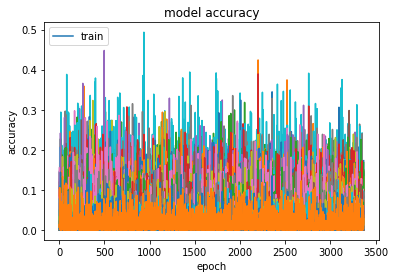

In [0]:
plt.plot(train_skin_embeddings)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
train_embeddings=np.load("Updated/VGGFace_Fc6_Train.npy")
test_embeddings=np.load("Updated/VGGFace_Fc6_Test.npy")
train_bmi=np.load("Updated/train_bmi.npy")
test_bmi=np.load("Updated/test_bmi.npy")

In [0]:
trainc=np.concatenate([train_embeddings,train_eyebrow_embeddings], axis=-1)
testc=np.concatenate([test_embeddings,test_eyebrow_embeddings],axis=-1)

In [0]:
from sklearn import preprocessing as fu
train_embeddings_l1=fu.normalize(train_embeddings,  norm='l1', axis=1)
test_embeddings_l1=fu.normalize(test_embeddings,  norm='l1', axis=1)